<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/Pizza_Place_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading main Pizza sales dataset
pizzas=pd.read_csv('/content/drive/My Drive/Pizza place sales/pizzas.csv')

In [ ]:
#showing first fe rows to confirm
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [ ]:
#loading the additional dataset
pizza_types=pd.read_csv('/content/drive/My Drive/Pizza place sales/pizza_types.csv',encoding="latin1")
print(pizza_types)

   pizza_type_id                                        name category  \
0        bbq_ckn                  The Barbecue Chicken Pizza  Chicken   
1       cali_ckn                The California Chicken Pizza  Chicken   
2    ckn_alfredo                   The Chicken Alfredo Pizza  Chicken   
3      ckn_pesto                     The Chicken Pesto Pizza  Chicken   
4     southw_ckn                 The Southwest Chicken Pizza  Chicken   
5       thai_ckn                      The Thai Chicken Pizza  Chicken   
6       big_meat                          The Big Meat Pizza  Classic   
7    classic_dlx                    The Classic Deluxe Pizza  Classic   
8       hawaiian                          The Hawaiian Pizza  Classic   
9    ital_cpcllo                 The Italian Capocollo Pizza  Classic   
10    napolitana                        The Napolitana Pizza  Classic   
11   pep_msh_pep  The Pepperoni, Mushroom, and Peppers Pizza  Classic   
12     pepperoni                         The Pepper

In [ ]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [ ]:
#merging the two datasets
merged_df=pizzas.merge(pizza_types,left_on='pizza_type_id',right_on='pizza_type_id')
merged_df.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


now our datasets combine information from both the pizzas(prices,sizes) pizza_types(category,name,ingredients)

Recommended Analysis
Pizza Place Sales A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas, served, with additional details on the type, size, quantity, price, and ingredients. Recommended Analysis How many customers do we have each day? Are there any peak hours? How many pizzas are typically in order? Do we have any bestsellers? How much money did we make this year? Can we identify any seasonality in the sales? Are there any pizzas we should take off the menu, or any promotions we could leverage?





In [33]:
#top selling pizzas
bestsellers=merged_df['name'].value_counts().head(10)
print("Top 10 Bestselling Pizzas:")
print(bestsellers)

Top 10 Bestselling Pizzas:
name
The Greek Pizza                 5
The Barbecue Chicken Pizza      3
The Chicken Alfredo Pizza       3
The California Chicken Pizza    3
The Southwest Chicken Pizza     3
The Thai Chicken Pizza          3
The Big Meat Pizza              3
The Chicken Pesto Pizza         3
The Classic Deluxe Pizza        3
The Hawaiian Pizza              3
Name: count, dtype: int64


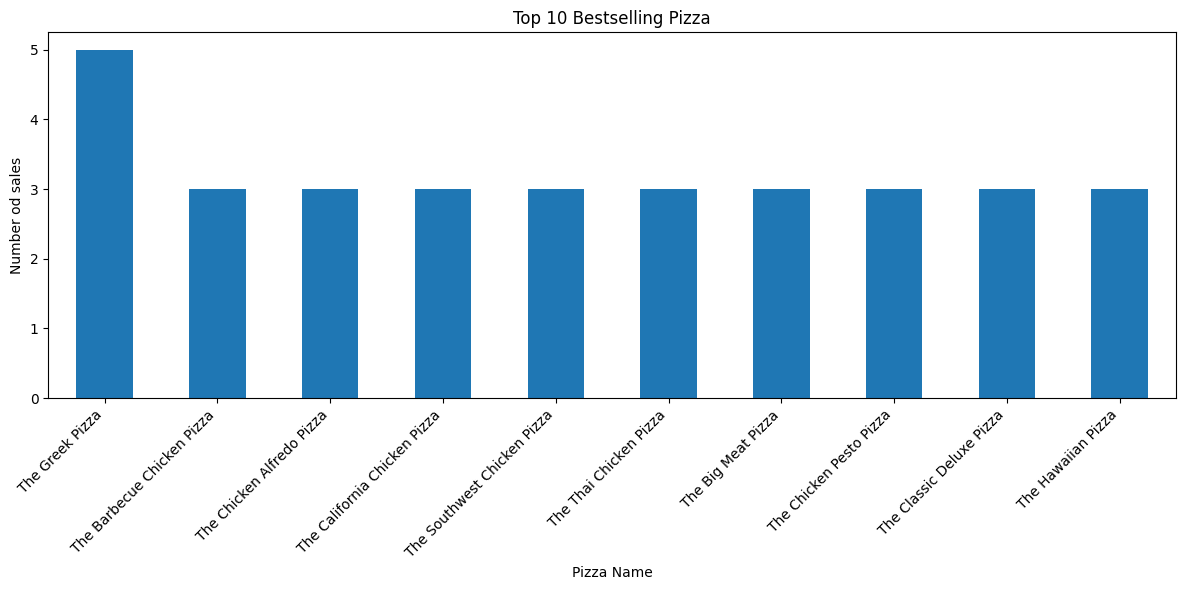

In [36]:
#Visualizing the bestsellers
plt.figure(figsize=(12,6))
bestsellers.plot(kind='bar')
plt.title('Top 10 Bestselling Pizza')
plt.xlabel('Pizza Name')
plt.ylabel('Number od sales')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

1. Pizza Place Sales
A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas, served, with additional details on the type, size, quantity, price, and ingredients.
Recommended Analysis
How many customers do we have each day? Are there any peak hours?
How many pizzas are typically in order? Do we have any bestsellers?
How much money did we make this year? Can we identify any seasonality in the sales?
Are there any pizzas we should take off the menu, or any promotions we could leverage?


In [40]:
#How many customers do we have each day?
orders=pd.read_csv('/content/drive/My Drive/Pizza place sales/orders.csv')
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [43]:
orders['date']=pd.to_datetime(orders['date'])
orders['hour']=pd.to_datetime(orders['time'],format='%H:%M:%S').dt.hour
#orders/customers per day
daily_orders=orders.groupby(orders['date'].dt.date).size()
print("Daily Orders:",daily_orders)



Daily Orders: date
2015-01-01    69
2015-01-02    67
2015-01-03    66
2015-01-04    52
2015-01-05    54
              ..
2015-12-27    35
2015-12-28    39
2015-12-29    27
2015-12-30    32
2015-12-31    73
Length: 358, dtype: int64


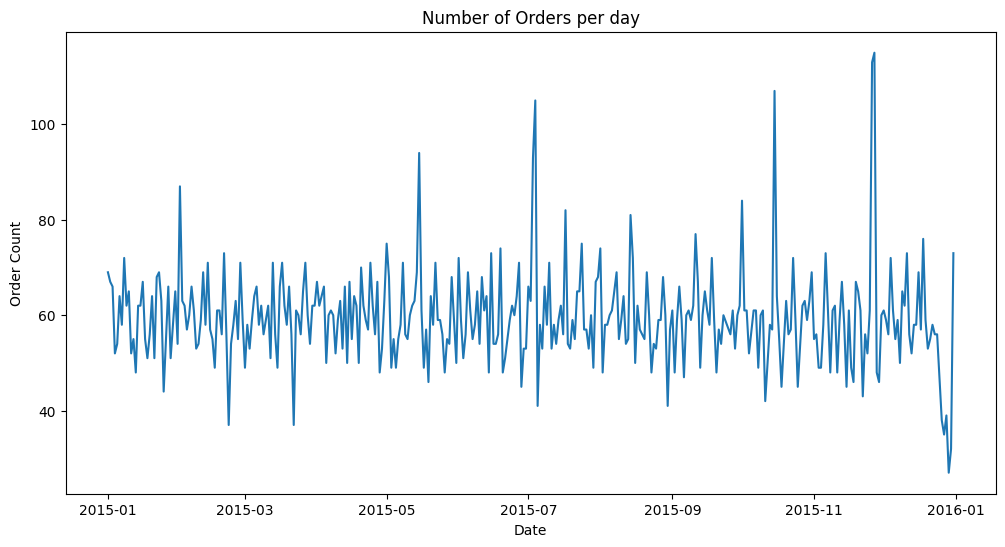

In [46]:
#plot for daily order trends
daily_orders.plot(figsize=(12,6))
plt.title('Number of Orders per day')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.show()

In [47]:
#peak hour analysis
hourly_orders=orders.groupby(orders['hour']).size()
print("Hourly Orders:",hourly_orders)

Hourly Orders: hour
9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
dtype: int64


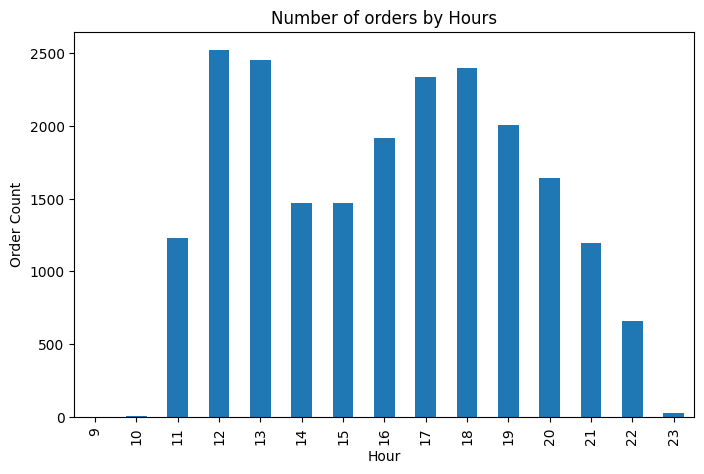

In [48]:
hourly_orders.plot(kind='bar',figsize=(8,5))
plt.title('Number of orders by Hours')
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.show()

In [51]:
#number of pizzas in typical order, loading order_details file
order_details=pd.read_csv('/content/drive/My Drive/Pizza place sales/order_details.csv')
pizzas_per_order=order_details.groupby('order_id')['quantity'].sum()
print("Pizzas per Order:",pizzas_per_order)

Pizzas per Order: order_id
1        1
2        5
3        2
4        1
5        1
        ..
21346    4
21347    4
21348    3
21349    1
21350    1
Name: quantity, Length: 21350, dtype: int64


In [53]:
#average pizza per order
average_pizzas=pizzas_per_order.mean()
print(f'Average number of pizzas per order:{average_pizzas:.2f}')

Average number of pizzas per order:2.32


In [55]:
#How much money did we make this year
#merging order_details data for full sales data
full_sales=order_details.merge(merged_df,left_on='pizza_id',right_on='pizza_id')
print(full_sales)

       order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                     2         2  classic_dlx_m         1   classic_dlx    M   
2                     3         2  five_cheese_l         1   five_cheese    L   
3                     4         2    ital_supr_l         1     ital_supr    L   
4                     5         2     mexicana_m         1      mexicana    M   
...                 ...       ...            ...       ...           ...  ...   
48615             48616     21348  ckn_alfredo_m         1   ckn_alfredo    M   
48616             48617     21348  four_cheese_l         1   four_cheese    L   
48617             48618     21348   napolitana_s         1    napolitana    S   
48618             48619     21349     mexicana_l         1      mexicana    L   
48619             48620     21350      bbq_ckn_s         1       bbq_ckn    S   

       price               

In [57]:
#calculating revenue for each line item
full_sales['revenue']=full_sales['quantity']*full_sales['price']
print(full_sales)

       order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                     2         2  classic_dlx_m         1   classic_dlx    M   
2                     3         2  five_cheese_l         1   five_cheese    L   
3                     4         2    ital_supr_l         1     ital_supr    L   
4                     5         2     mexicana_m         1      mexicana    M   
...                 ...       ...            ...       ...           ...  ...   
48615             48616     21348  ckn_alfredo_m         1   ckn_alfredo    M   
48616             48617     21348  four_cheese_l         1   four_cheese    L   
48617             48618     21348   napolitana_s         1    napolitana    S   
48618             48619     21349     mexicana_l         1      mexicana    L   
48619             48620     21350      bbq_ckn_s         1       bbq_ckn    S   

       price               

In [58]:
#total revenue for the year
total_revenue=full_sales['revenue'].sum()
print(f'Total Revenue for the year:${total_revenue:.2f}')

Total Revenue for the year:$817860.05


In [61]:
#Can we identify any seasonality in the sales
monthly_revenue=full_sales.groupby('year_month')['revenue'].sum()

KeyError: 'year_month'